<h1 align="center">Análisis de la función de partición canónica, energía térmica y valor esperado de la energía para partículas cuánticas en un pozo de potencial infinito unidimensional a temperatura T</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>


## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cte

## 2. Planteamiento del problema

Sea una nanoestructura a una temperatura $T$ en la cual los electrones quedan confinados en una dimensión. Supóngase que se puede modelar la nanoestructura como un pozo de potencial infinito de ancho $L$ y la aproximación de masa efectiva es válida, de tal manera que $m^*$ es la masa efectiva de los  electrones.  La energía $E_r$ para el microestado r-ésimo, definido por el número cuántico $n_r$, está dada por:

$$E_r = \frac{\pi^2 \hbar^2}{2 m^*} \frac{n_r^2}{L^2}$$

El valor esperado de la energía $\bar{E}$ está dado por:

$$\bar{E} = \frac{1}{Z} \sum_r {E_r e^{- \beta E_r}} $$

Donde,

$$\beta = \frac{1}{k_B T}$$
$$Z = \sum_r{e^{- \beta E_r}}$$

Se conoce como energía térmica al término $k_B T$.

a) Suponga que $E_r$ puede ser analizada como una variable continua, ¿para cuál valor de $E_r$ ocurre el máximo de $E_r e^{- \beta E_r}$?

b) ¿Cuáles términos $E_r e^{- \beta E_r}$ contribuyen más al valor esperado de la energía $\bar{E}$?

## 3. Métodos y definiciones

In [2]:
def microstate_energies(N=30, meff=0.5, L=10e-9):
    """
    microstate_energies(N=30, meff=0.5, L=10e-9) obtiene los primeros N niveles de energía
        para una partícula cuántica con masa efectiva meff en un pozo de potencial infinito
        con ancho L.  La energía se calcula en unidades meV.
    """
    n = np.arange(N)
    m_eff = meff * cte.m_e
    a = (np.pi * cte.hbar) ** 2 / (2 *  m_eff) 
    return (1000 / cte.e) * a * n**2 / L**2 

In [3]:
def Er_zr(T, Er):
    """
    Er_zr(T, Er) compomente r-ésima, en meV, de la expresión para obtener la energía media
        Er exp( - β Er )
    """
    β = 1 / ( (1000 / cte.e) * cte.Boltzmann * T )
    return Er * np.exp(- β * Er)

In [4]:
def mean_energy(T, Er):
    """
    mean_energy(T, Er) energía media, en meV, para una distribución canónica.
    """
    β = 1 / ( (1000 / cte.e) * cte.Boltzmann * T )
    zr = sum( Er_zr(T, Er) )
    Z  = sum( np.exp( - β * Er) )
    return zr/Z

In [5]:
temperatures = [
    { 
        'T' : 9940,
        'label': r'Sirius $\alpha$ (9940 K)',
        'marker': '>',
        'color':'b',
    },
    { 
        'T' : 5800,
        'label': 'Sol (5800 K)',
        'marker': '.',
        'color':'g',
    },
    { 
        'T' : 3000,
        'label': 'Bombilla (3000 K)',
        'marker': '.',
        'color': 'y',
    },
    { 
        'T' : 300,
        'label': 'Tierra (300 K)',
        'marker': '<',
        'color': 'k',
    },
]

## 4. Figuras

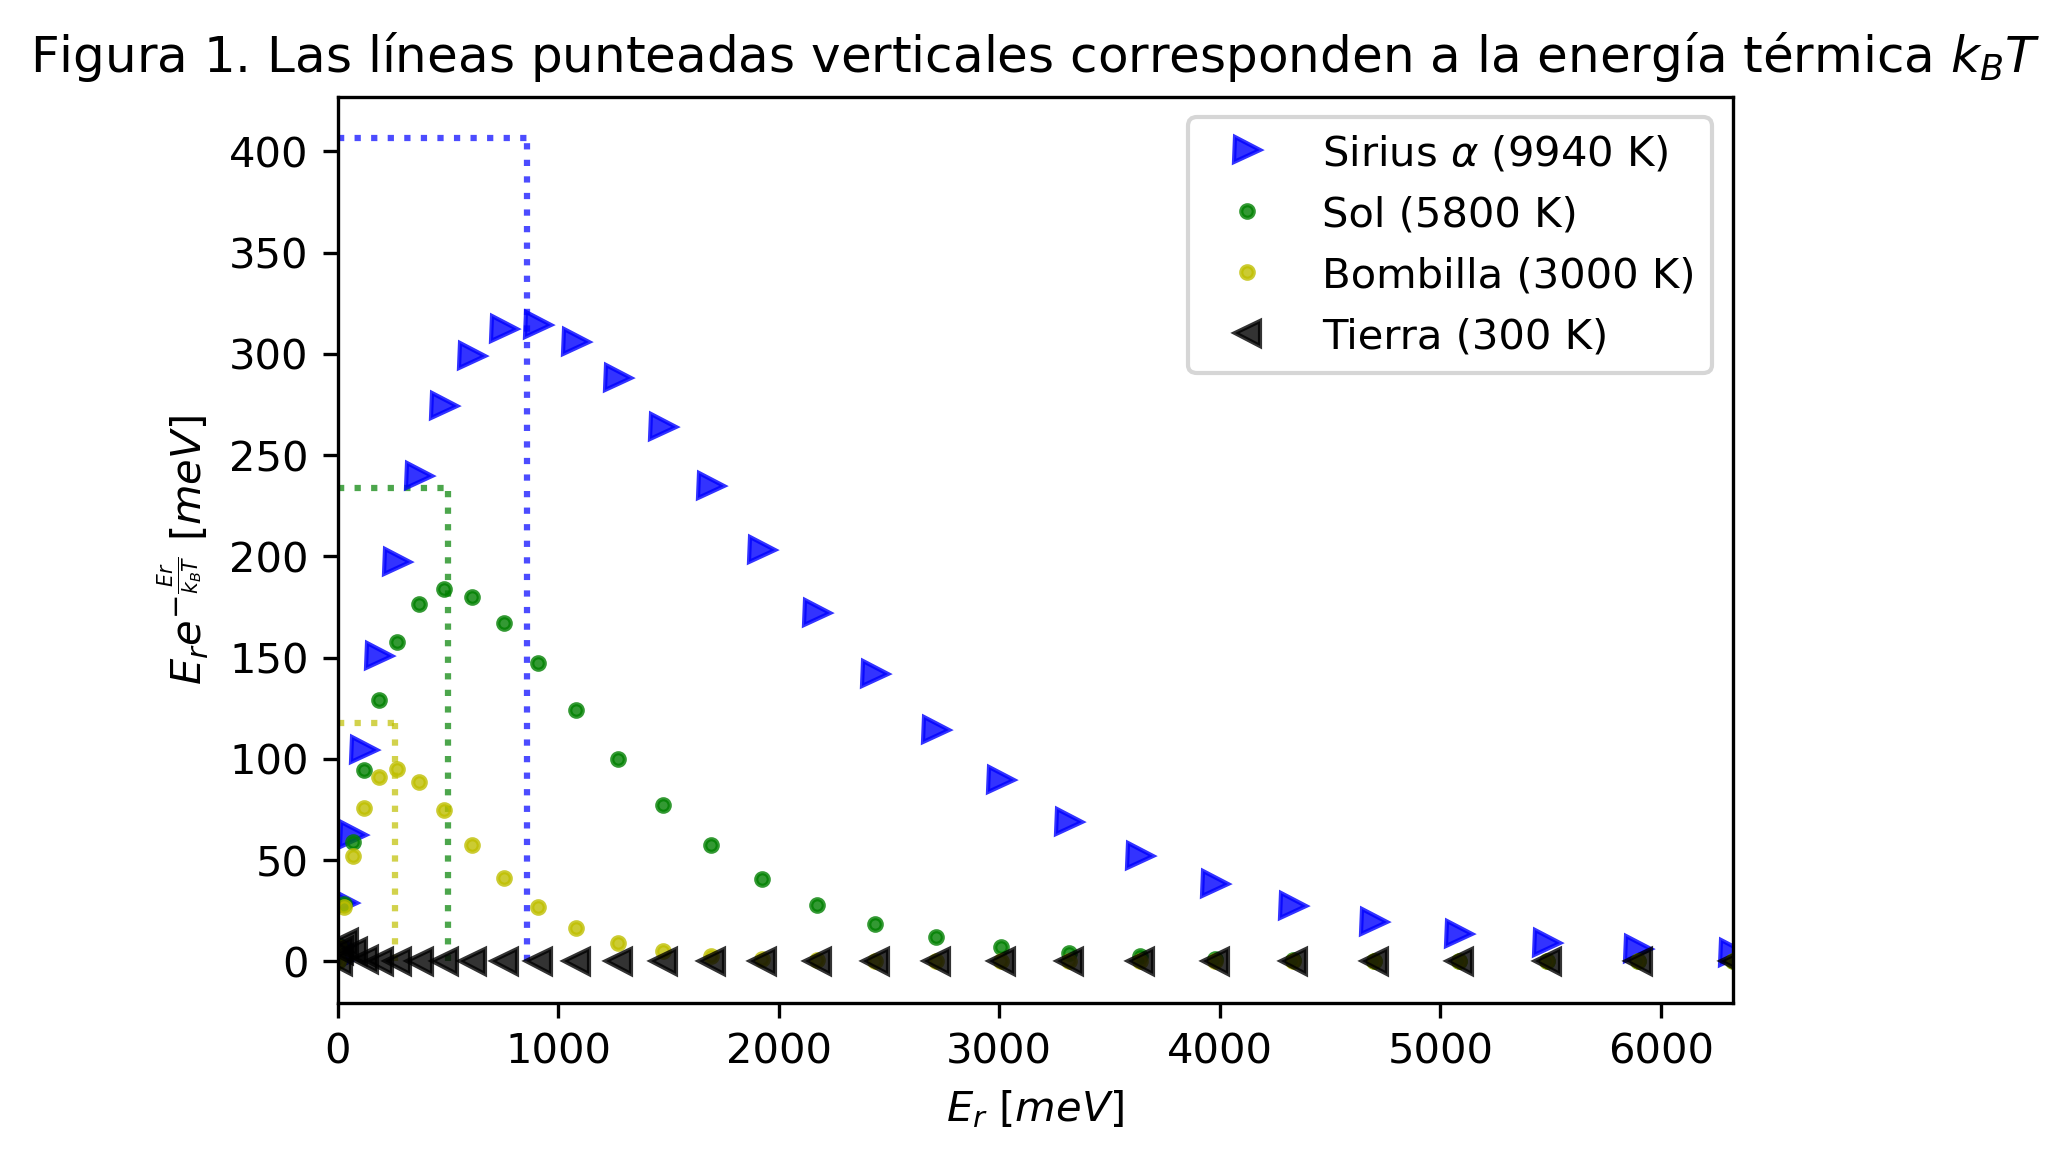

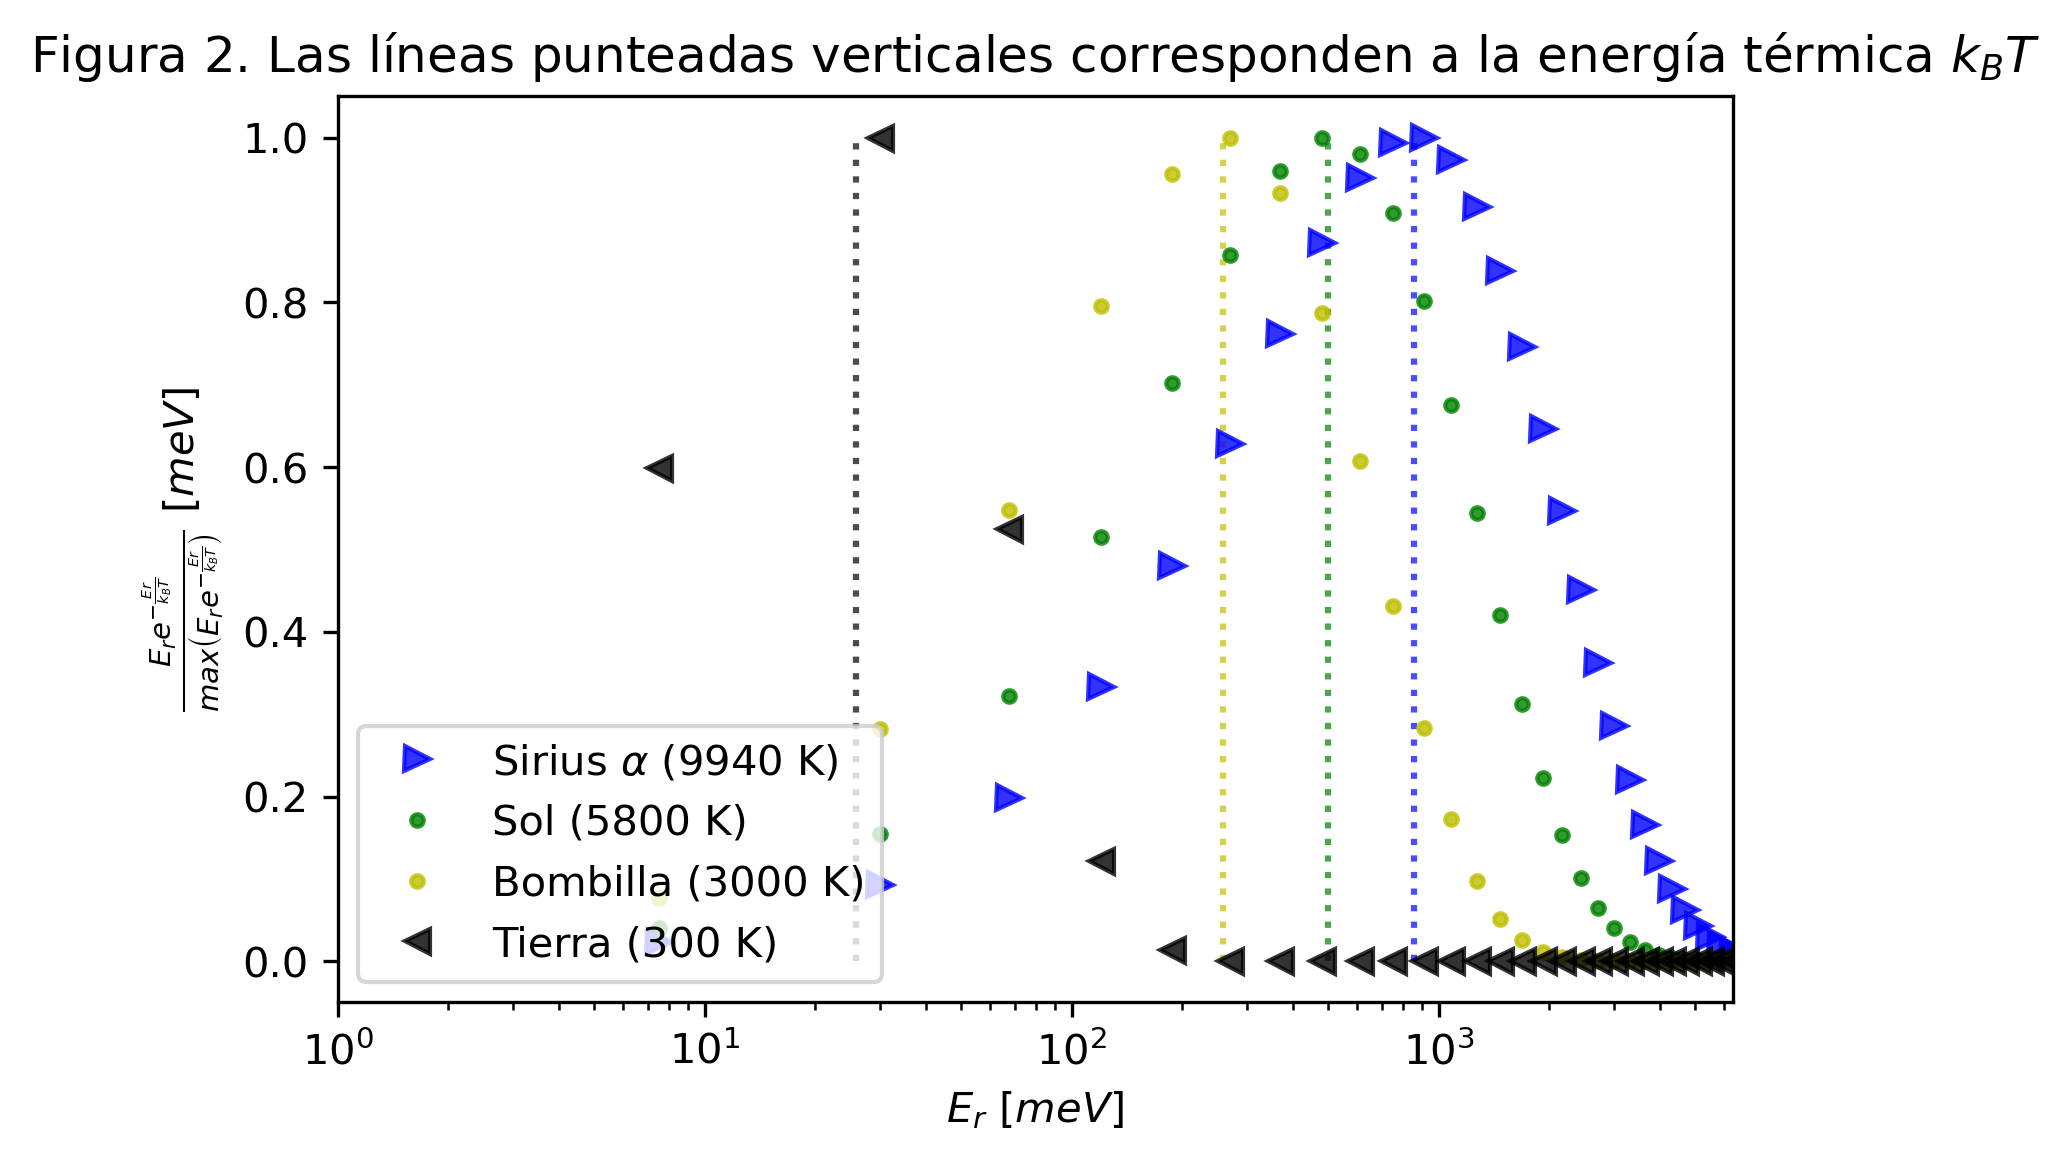

In [6]:
plt.figure(1, dpi=300)
plt.figure(2, dpi=300)
Er = microstate_energies(N=30)
for o in temperatures:
    x = Er
    y = Er_zr(o['T'], Er)
    E_mean = mean_energy(o['T'], microstate_energies(N=500))
    kT = (1000 / cte.e) * cte.Boltzmann * o['T'] 
    plt.figure(1)
    plt.plot(x, y, o['marker'], color=o['color'], label=o['label'], alpha=0.8)
    plt.hlines(y=E_mean, xmin=min(x), xmax=kT, color=o['color'], linestyles ='dotted', alpha=0.7)
    plt.vlines(x=kT, ymin=min(y), ymax=E_mean, color=o['color'], linestyles ='dotted', alpha=0.7)
    plt.figure(2)
    plt.semilogx(x, y/max(y), o['marker'], color=o['color'], label=o['label'], alpha=0.8)
    plt.vlines(x=kT, ymin=0, ymax=1, color=o['color'], linestyles ='dotted', alpha=0.7)
for fig in [1, 2]:
    plt.figure(fig)
    plt.title(r'Figura %d. Las líneas punteadas verticales corresponden a la energía térmica $k_B T$' % fig)
    plt.xlabel(r'$E_r$ $[meV]$')
    if fig == 1:
        plt.ylabel(r'$E_r e^{-\frac{Er}{k_B T}}$ $[meV]$')
        plt.xlim(min(x), max(x))
    if fig == 2:
        plt.ylabel(r'$\frac{E_r e^{-\frac{Er}{k_B T}}}{max\left( E_r e^{-\frac{Er}{k_B T}} \right)}$ $[meV]$')
        plt.xlim(max(min(x), 1), max(x))
    _ = plt.legend(loc=3 if fig == 2 else 0)

## 5. Preguntas de autoexplicación

5.1. ¿Cuál es la interpretación física de la masa efectiva del electrón?

5.2. Interprete la expresión $E_r e^{- \beta E_r}$.

5.3. Describa como los métodos del ítem 3 implementan las ecuaciones del ítem 2.

5.4. En el ítem 3, ¿qué ventajas encuentra en definir el objeto *temperatures* como una lista de diccionarios?

5.5. Demuestre que el valor máximo observado en las figuras corresponde a la energía térmica $k_B T$.

End!